# Chapter 4 - Training Models

* Polynomial Regression is more prone to overfitting as it has more parameters than Linear Regression

# Linear Regression

### testing the Normal Equation:

a closed-form solution to find the value of parameters(theata) that minimizes the cost function

In [1]:
import numpy as np

In [12]:
X = 2* np.random.rand(100,1) # generates 100x1 array of numbers bw 2*(0 and 1)
y = 4 + 3*X + np.random.randn(100,1) # generates a 100x1 array of numbers from the standard normal distribution - Gaussian Noise

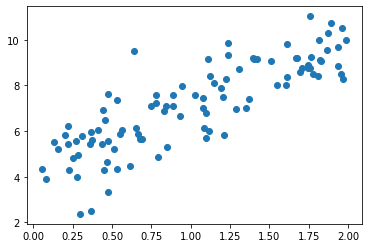

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [14]:
X_b = np.c_[np.ones((100,1)), X] # add x0 =1 to each instance
# numpy.c_ : Translates slice objects to concatenation along the second axis.

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[4.31932866],
       [2.77747933]])

In [18]:
# let's predict with this model

X_new = np.array([[0], [2]]) 
X_new_b = np.c_[np.ones((2,1)), X_new] # x0 = 1
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.31932866],
       [9.87428733]])

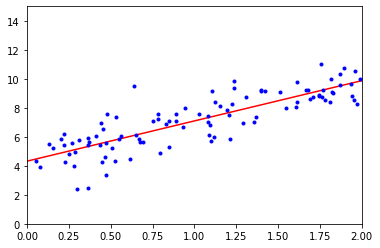

In [22]:
# plotting this regression Line
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]) # setting the minimum and max values on both the axis
plt.show()

## Using SkLearn

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X_new)

array([[4.31932866],
       [9.87428733]])

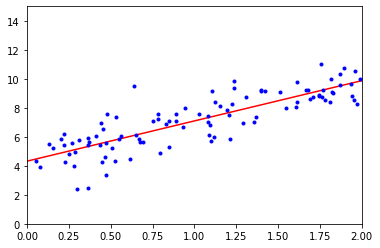

In [25]:
# plotting this regression Line
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, "b.")
plt.axis([0,2,0,15]) # setting the minimum and max values on both the axis
plt.show()